# Data Pre Processing 

In [132]:
import pandas as pd

In [133]:
#read data from data set 
data1 = pd.read_csv("DataSets/col_mat_nuw_output.csv",header = None)
data2 = pd.read_csv("DataSets/kan_output.csv", header=None)
data3 = pd.read_csv("DataSets/mon_kur_jaf_output.csv", header=None)
data = pd.concat([data1,data2,data3])
data.shape

(12782, 4)

In [134]:
data.columns = ["HCHO reading", "Location", "Current Date", "Next Date"]
data

,HCHO reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Jaffna Proper,2023-12-27,2023-12-28
5474,0.000051,Jaffna Proper,2023-12-28,2023-12-29
5475,0.000127,Jaffna Proper,2023-12-29,2023-12-30
5476,0.000117,Jaffna Proper,2023-12-30,2023-12-31


In [135]:
for column in data:
    print(column)
    print(data[column].unique())
    print('\n')

HCHO reading
[1.96983440e-04 2.62552217e-04 9.85211890e-05 ... 1.26723537e-04
 1.16658954e-04 6.54085299e-05]


Location
['Colombo Proper' 'Deniyaya, Matara' 'Nuwara Eliya Proper' 'Kandy Proper'
 'Bibile, Monaragala' 'Kurunegala Proper' 'Jaffna Proper']


Current Date
['2019-01-01' '2019-01-02' '2019-01-03' ... '2023-12-29' '2023-12-30'
 '2023-12-31']


Next Date
['2019-01-02' '2019-01-03' '2019-01-04' ... '2023-12-30' '2023-12-31'
 '2024-01-01']


In [136]:
colombo_df = data[data['Location'] == "Colombo Proper"]
jaffna_df = data[data['Location'] == "Jaffna Proper"]
deniyaya_df = data[data['Location'] == "Deniyaya, Matara"]
nuwaraEliya_df = data[data['Location'] == "Nuwara Eliya Proper"]
kandy_df = data[data['Location'] == "Kandy Proper"]
bibile_df = data[data['Location'] == "Bibile, Monaragala"]
kurunegala_df = data[data['Location'] == "Kurunegala Proper"]

In [137]:
colombo_df

,HCHO reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
1821,0.000118,Colombo Proper,2023-12-27,2023-12-28
1822,NaN,Colombo Proper,2023-12-28,2023-12-29
1823,NaN,Colombo Proper,2023-12-29,2023-12-30
1824,0.000140,Colombo Proper,2023-12-30,2023-12-31


In [138]:
jaffna_df

,HCHO reading,Location,Current Date,Next Date
3652,0.000058,Jaffna Proper,2019-01-01,2019-01-02
3653,0.000102,Jaffna Proper,2019-01-02,2019-01-03
3654,0.000039,Jaffna Proper,2019-01-03,2019-01-04
3655,-0.000002,Jaffna Proper,2019-01-04,2019-01-05
3656,0.000159,Jaffna Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Jaffna Proper,2023-12-27,2023-12-28
5474,0.000051,Jaffna Proper,2023-12-28,2023-12-29
5475,0.000127,Jaffna Proper,2023-12-29,2023-12-30
5476,0.000117,Jaffna Proper,2023-12-30,2023-12-31


In [139]:
deniyaya_df

,HCHO reading,Location,Current Date,Next Date
1826,NaN,"Deniyaya, Matara",2019-01-01,2019-01-02
1827,0.000006,"Deniyaya, Matara",2019-01-02,2019-01-03
1828,0.000236,"Deniyaya, Matara",2019-01-03,2019-01-04
1829,0.000064,"Deniyaya, Matara",2019-01-04,2019-01-05
1830,0.000053,"Deniyaya, Matara",2019-01-05,2019-01-06
...,...,...,...,...
3647,0.000228,"Deniyaya, Matara",2023-12-27,2023-12-28
3648,NaN,"Deniyaya, Matara",2023-12-28,2023-12-29
3649,NaN,"Deniyaya, Matara",2023-12-29,2023-12-30
3650,0.000116,"Deniyaya, Matara",2023-12-30,2023-12-31


In [140]:
nuwaraEliya_df

,HCHO reading,Location,Current Date,Next Date
3652,NaN,Nuwara Eliya Proper,2019-01-01,2019-01-02
3653,NaN,Nuwara Eliya Proper,2019-01-02,2019-01-03
3654,0.000191,Nuwara Eliya Proper,2019-01-03,2019-01-04
3655,0.000051,Nuwara Eliya Proper,2019-01-04,2019-01-05
3656,0.000065,Nuwara Eliya Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Nuwara Eliya Proper,2023-12-27,2023-12-28
5474,NaN,Nuwara Eliya Proper,2023-12-28,2023-12-29
5475,NaN,Nuwara Eliya Proper,2023-12-29,2023-12-30
5476,NaN,Nuwara Eliya Proper,2023-12-30,2023-12-31


In [141]:
kandy_df

,HCHO reading,Location,Current Date,Next Date
0,0.000176,Kandy Proper,2019-01-01,2019-01-02
1,0.000092,Kandy Proper,2019-01-02,2019-01-03
2,NaN,Kandy Proper,2019-01-03,2019-01-04
3,0.000191,Kandy Proper,2019-01-04,2019-01-05
4,0.000122,Kandy Proper,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Kandy Proper,2023-12-27,2023-12-28
1822,NaN,Kandy Proper,2023-12-28,2023-12-29
1823,NaN,Kandy Proper,2023-12-29,2023-12-30
1824,0.000056,Kandy Proper,2023-12-30,2023-12-31


In [142]:
bibile_df

,HCHO reading,Location,Current Date,Next Date
0,NaN,"Bibile, Monaragala",2019-01-01,2019-01-02
1,0.000019,"Bibile, Monaragala",2019-01-02,2019-01-03
2,0.000028,"Bibile, Monaragala",2019-01-03,2019-01-04
3,0.000037,"Bibile, Monaragala",2019-01-04,2019-01-05
4,-0.000018,"Bibile, Monaragala",2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,"Bibile, Monaragala",2023-12-27,2023-12-28
1822,NaN,"Bibile, Monaragala",2023-12-28,2023-12-29
1823,NaN,"Bibile, Monaragala",2023-12-29,2023-12-30
1824,NaN,"Bibile, Monaragala",2023-12-30,2023-12-31


In [143]:
kurunegala_df

,HCHO reading,Location,Current Date,Next Date
1826,0.000088,Kurunegala Proper,2019-01-01,2019-01-02
1827,0.000137,Kurunegala Proper,2019-01-02,2019-01-03
1828,0.000148,Kurunegala Proper,2019-01-03,2019-01-04
1829,-0.000002,Kurunegala Proper,2019-01-04,2019-01-05
1830,0.000249,Kurunegala Proper,2019-01-05,2019-01-06
...,...,...,...,...
3647,0.000075,Kurunegala Proper,2023-12-27,2023-12-28
3648,NaN,Kurunegala Proper,2023-12-28,2023-12-29
3649,NaN,Kurunegala Proper,2023-12-29,2023-12-30
3650,0.000158,Kurunegala Proper,2023-12-30,2023-12-31


In [144]:
colombo_df.isnull().sum()

HCHO reading    487
Location          0
Current Date      0
Next Date         0
dtype: int64

In [145]:
#Filling null values using mode method
colombo_df_mode_value = colombo_df['HCHO reading'].mode()[0]
colombo_df['HCHO reading'].fillna(colombo_df_mode_value, inplace=True)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_10076\3925198408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colombo_df['HCHO reading'].fillna(colombo_df_mode_value, inplace=True)


In [146]:
colombo_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [147]:
jaffna_df.isnull().sum()

HCHO reading    365
Location          0
Current Date      0
Next Date         0
dtype: int64

In [148]:
jaffna_mode_value = jaffna_df['HCHO reading'].mode()[0]
jaffna_df['HCHO reading'].fillna(jaffna_mode_value, inplace=True)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_10076\1461874687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jaffna_df['HCHO reading'].fillna(jaffna_mode_value, inplace=True)


In [149]:
jaffna_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [150]:
kandy_df.isnull().sum()

HCHO reading    793
Location          0
Current Date      0
Next Date         0
dtype: int64

In [151]:
kandy_mode_value = kandy_df['HCHO reading'].mode()[0]
kandy_df['HCHO reading'].fillna(kandy_mode_value, inplace=True)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_10076\4092450002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kandy_df['HCHO reading'].fillna(kandy_mode_value, inplace=True)


In [152]:
kandy_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [153]:
nuwaraEliya_df.isnull().sum()

HCHO reading    1085
Location           0
Current Date       0
Next Date          0
dtype: int64

In [154]:
nuwaraEliya_mode_value = nuwaraEliya_df['HCHO reading'].mode()[0]
nuwaraEliya_df['HCHO reading'].fillna(nuwaraEliya_mode_value, inplace = True)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_10076\3115936726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuwaraEliya_df['HCHO reading'].fillna(nuwaraEliya_mode_value, inplace = True)


In [155]:
nuwaraEliya_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [156]:
bibile_df.isnull().sum()

HCHO reading    695
Location          0
Current Date      0
Next Date         0
dtype: int64

In [157]:
bibille_mode_value = bibile_df['HCHO reading'].mode()[0]
bibile_df['HCHO reading'].fillna(bibille_mode_value, inplace = True)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_10076\3670316039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bibile_df['HCHO reading'].fillna(bibille_mode_value, inplace = True)


In [158]:
bibile_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [159]:
deniyaya_df.isnull().sum()

HCHO reading    847
Location          0
Current Date      0
Next Date         0
dtype: int64

In [160]:
deniyaya_mode_value =deniyaya_df["HCHO reading"].mode()[0]
deniyaya_df["HCHO reading"].fillna(deniyaya_mode_value, inplace = True)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_10076\2122747618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deniyaya_df["HCHO reading"].fillna(deniyaya_mode_value, inplace = True)


In [161]:
deniyaya_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [162]:
kurunegala_df.isnull().sum()

HCHO reading    592
Location          0
Current Date      0
Next Date         0
dtype: int64

In [163]:
kurunegala_mode_value =kurunegala_df["HCHO reading"].mode()[0]
kurunegala_df["HCHO reading"].fillna(kurunegala_mode_value,inplace = True)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_10076\539521698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kurunegala_df["HCHO reading"].fillna(kurunegala_mode_value,inplace = True)


In [164]:
kurunegala_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

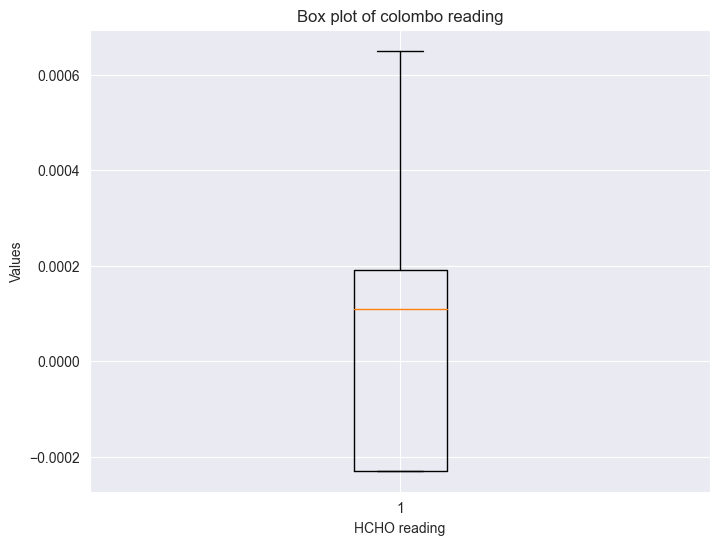

In [165]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(colombo_df['HCHO reading'])
plt.title('Box plot of colombo reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

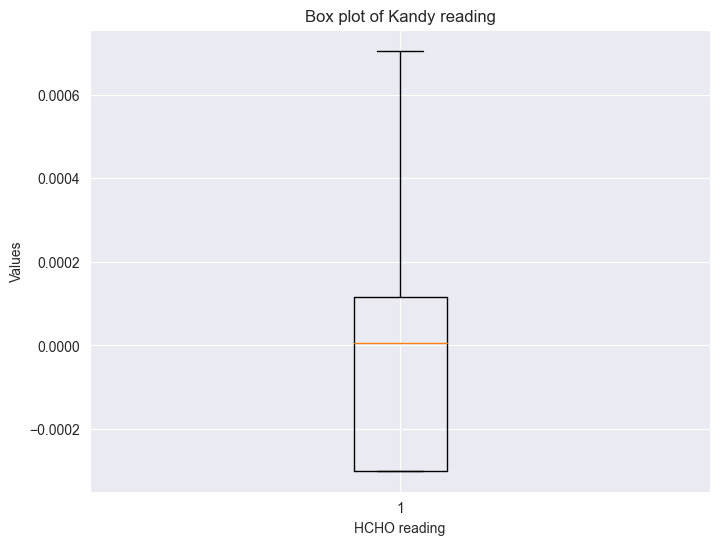

In [166]:
plt.figure(figsize=(8, 6))
plt.boxplot(kandy_df['HCHO reading'])
plt.title('Box plot of Kandy reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

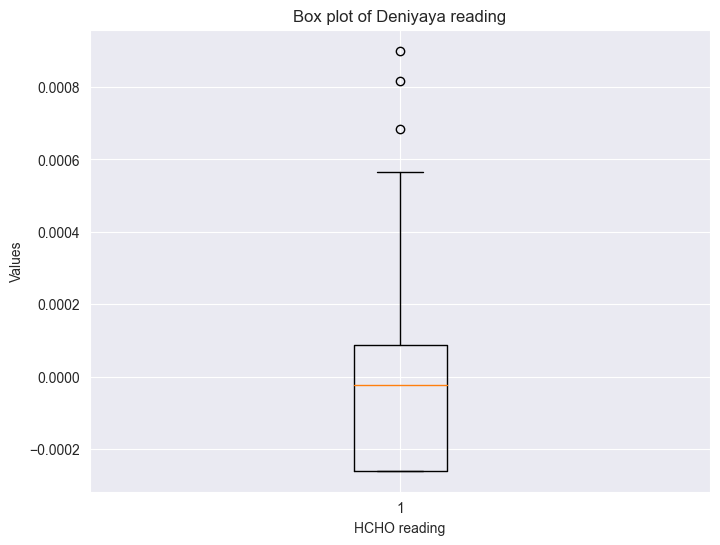

In [167]:
plt.figure(figsize=(8, 6))
plt.boxplot(deniyaya_df['HCHO reading'])
plt.title('Box plot of Deniyaya reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [183]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = deniyaya_df['HCHO reading'].quantile(0.25)
Q3 = deniyaya_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = deniyaya_df['HCHO reading'][deniyaya_df['HCHO reading'] <= upper_whisker].max()

print("Upper bound within the boxplot:", upper_bound_data)

Upper bound within the boxplot: 0.0005638530012409


In [184]:
deniyaya_df = deniyaya_df.drop(deniyaya_df[(deniyaya_df['HCHO reading'] >= 0.0005638530012409)].index)

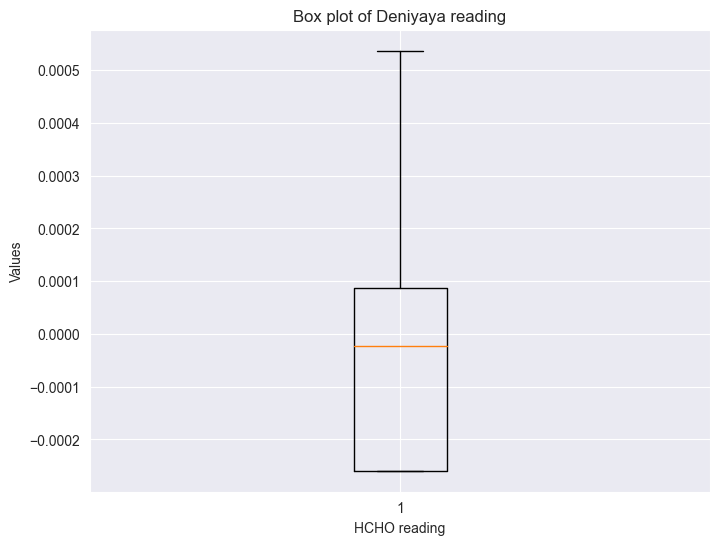

In [185]:
plt.figure(figsize=(8, 6))
plt.boxplot(deniyaya_df['HCHO reading'])
plt.title('Box plot of Deniyaya reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

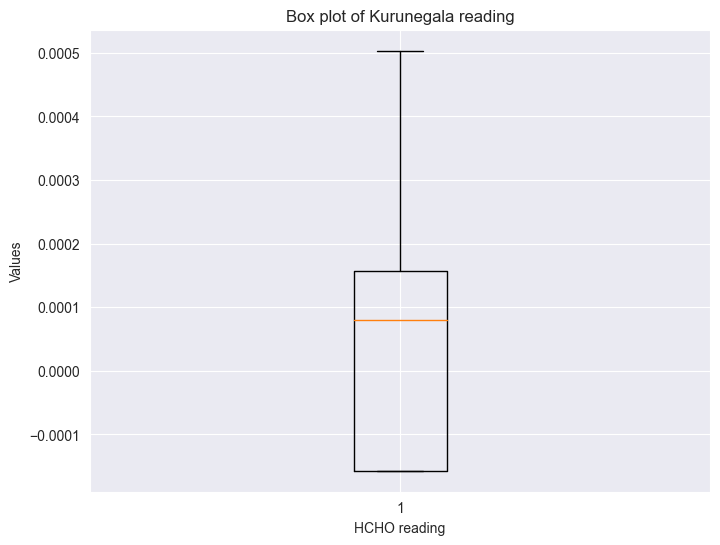

In [168]:
plt.figure(figsize=(8, 6))
plt.boxplot(kurunegala_df['HCHO reading'])
plt.title('Box plot of Kurunegala reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

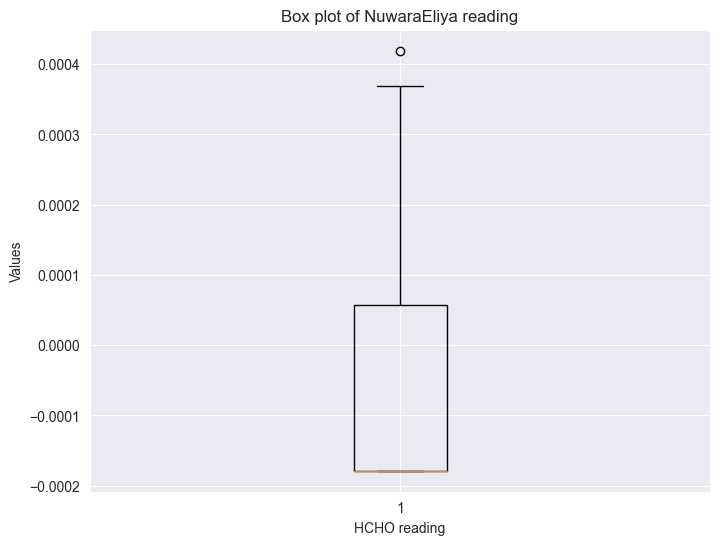

In [169]:
plt.figure(figsize=(8, 6))
plt.boxplot(nuwaraEliya_df['HCHO reading'])
plt.title('Box plot of NuwaraEliya reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [180]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = nuwaraEliya_df['HCHO reading'].quantile(0.25)
Q3 = nuwaraEliya_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = nuwaraEliya_df['HCHO reading'][nuwaraEliya_df['HCHO reading'] <= upper_whisker].max()


print("Upper bound within the boxplot:", upper_bound_data)

Upper bound within the boxplot: 0.0003689670671425


In [181]:
nuwaraEliya_df = nuwaraEliya_df.drop(nuwaraEliya_df[(nuwaraEliya_df['HCHO reading'] >= 0.0003689670671425)].index)

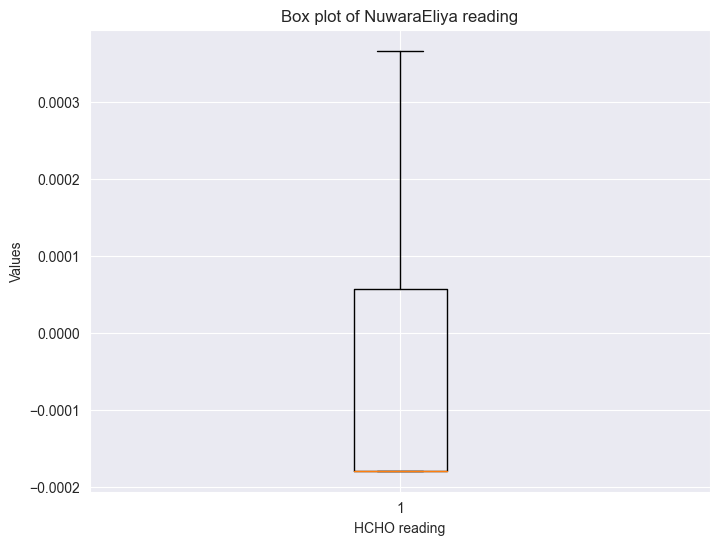

In [182]:
plt.figure(figsize=(8, 6))
plt.boxplot(nuwaraEliya_df['HCHO reading'])
plt.title('Box plot of NuwaraEliya reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

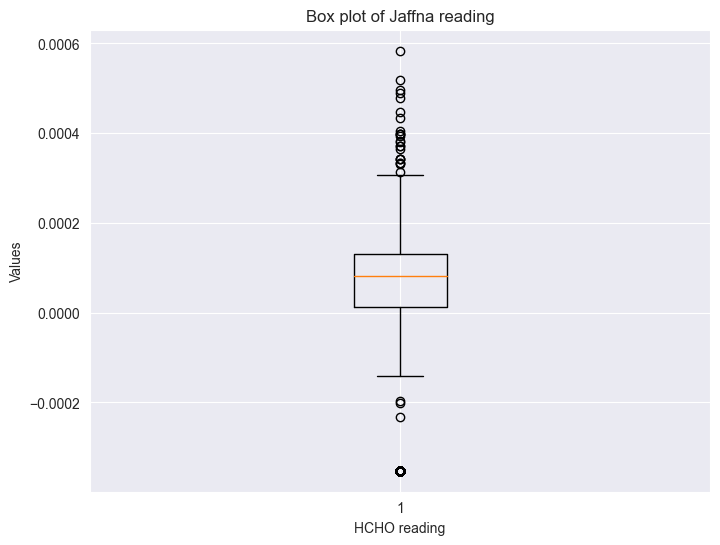

In [170]:
plt.figure(figsize=(8, 6))
plt.boxplot(jaffna_df['HCHO reading'])
plt.title('Box plot of Jaffna reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [171]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = jaffna_df['HCHO reading'].quantile(0.25)
Q3 = jaffna_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = jaffna_df['HCHO reading'][jaffna_df['HCHO reading'] <= upper_whisker].max()
# Find the lowest data point within the lower whisker range
lower_bound_data = jaffna_df['HCHO reading'][jaffna_df['HCHO reading'] >= lower_whisker].min()

print("Upper bound within the boxplot:", upper_bound_data)
print("Lower bound within the boxplot:", lower_bound_data)

Upper bound within the boxplot: 0.000307007082162
Lower bound within the boxplot: -0.0001409249825353


In [172]:
jaffna_df = jaffna_df.drop(jaffna_df[(jaffna_df['HCHO reading'] >= 0.000307007082162)].index)
jaffna_df = jaffna_df.drop(jaffna_df[(jaffna_df['HCHO reading'] <= -0.0001409249825353)].index)

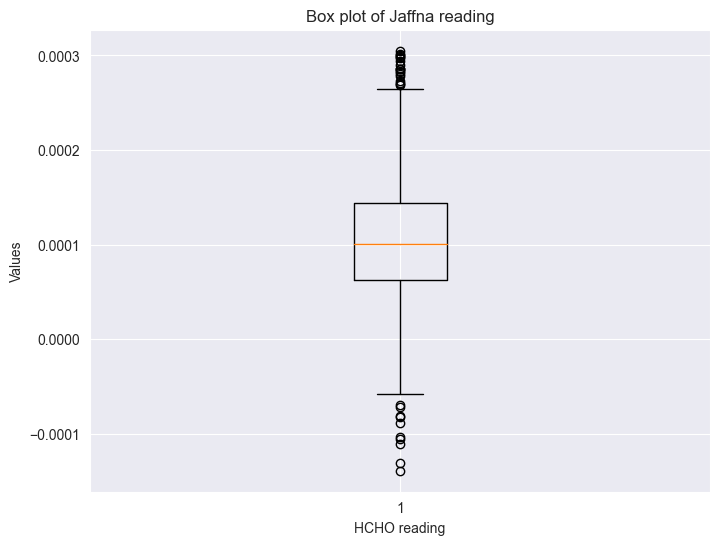

In [173]:
plt.figure(figsize=(8, 6))
plt.boxplot(jaffna_df['HCHO reading'])
plt.title('Box plot of Jaffna reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

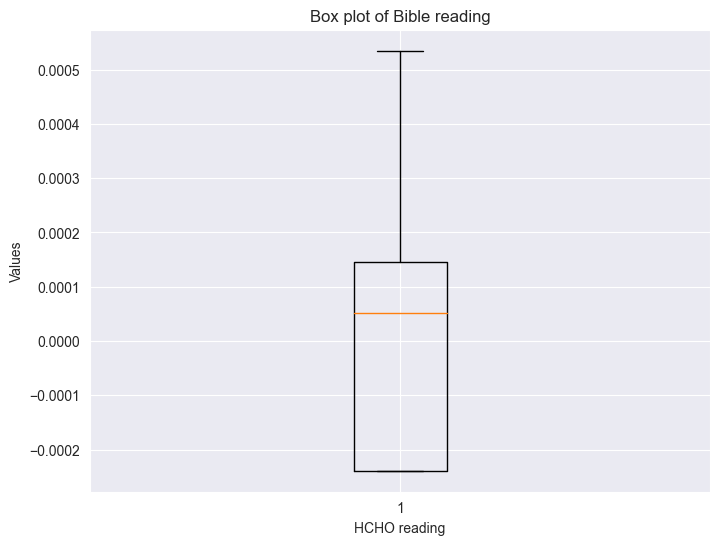

In [174]:
plt.figure(figsize=(8, 6))
plt.boxplot(bibile_df['HCHO reading'])
plt.title('Box plot of Bible reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [175]:
colombo_df["Current Date"].duplicated().sum()

0

In [176]:
colombo_df["Next Date"].duplicated().sum()

0

In [177]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [178]:
result = adfuller(colombo_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.470289
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [179]:
#Making stationary colombo_df
